In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

建立AdaBoost算法之前，我们必须先建立弱分类器，并保存样本的权重。弱分类器使用单层决策树（decision stump），也称决策树桩，它是一种简单的决策树，通过给定的阈值，进行分类。

为了训练单层决策树，我们需要创建一个训练集，编写代码如下：



In [4]:
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadSimpData():
    """
    创建单层决策树的数据集
    Parameters:
        无
    Returns:
        dataMat - 数据矩阵
        classLabels - 数据标签
    """
    datMat = np.matrix([[ 1. ,  2.1],
        [ 1.5,  1.6],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels
def showDataSet(dataMat, labelMat):
    """
    数据可视化
    Parameters:
        dataMat - 数据矩阵
        labelMat - 数据标签
    Returns:
        无
    """
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)                                             #转换为numpy矩阵
    data_minus_np = np.array(data_minus)                                         #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])        #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1])     #负样本散点图
    plt.show()

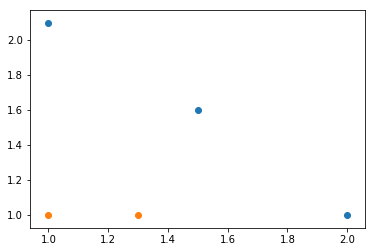

In [5]:
dataArr,classLabels = loadSimpData()
showDataSet(dataArr,classLabels)


可以看到，如果想要试着从某个坐标轴上选择一个值（即选择一条与坐标轴平行的直线）来将所有的蓝色圆点和橘色圆点分开，这显然是不可能的。这就是单层决策树难以处理的一个著名问题。通过使用多颗单层决策树，我们可以构建出一个能够对该数据集完全正确分类的分类器。

In [6]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
    
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst


In [7]:
dataArr,classLabels = loadSimpData()
D = np.mat(np.ones((5, 1)) / 5)
bestStump,minError,bestClasEst = buildStump(dataArr,classLabels,D)
print('bestStump:\n', bestStump)
print('minError:\n', minError)
print('bestClasEst:\n', bestClasEst)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

通过遍历，改变不同的阈值，计算最终的分类误差，找到分类误差最小的分类方式，即为我们要找的最佳单层决策树。这里lt表示less than，表示分类方式，对于小于阈值的样本点赋值为-1，gt表示greater than，也是表示分类方式，对于大于阈值的样本点赋值为-1。经过遍历，我们找到，训练好的最佳单层决策树的最小分类误差为0.2，就是对于该数据集，无论用什么样的单层决策树，分类误差最小就是0.2。这就是我们训练好的弱分类器。接下来，使用AdaBoost算法提升分类器性能，将分类误差缩短到0，看下AdaBoost算法是如何实现的。

# 使用AdaBoost提升分类器性能

In [8]:
def adaBoostTrainDS(dataArr, classLabels, numIt = 40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)                                            #初始化权重
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)     #构建单层决策树
        print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))         #计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
        bestStump['alpha'] = alpha                                          #存储弱学习算法权重
        weakClassArr.append(bestStump)                                      #存储单层决策树
        print("classEst: ", classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                      
        D = D / D.sum()                                                        #根据样本权重公式，更新样本权重
        #计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst                                 
        print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))     #计算误差
        errorRate = aggErrors.sum() / m
        print("total error: ", errorRate)
        if errorRate == 0.0: break                                             #误差为0，退出循环
    return weakClassArr, aggClassEst

In [9]:
dataArr,classLabels = loadSimpData()
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, classLabels)
print(weakClassArr)
print(aggClassEst)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

在第一轮迭代中，D中的所有值都相等。于是，只有第一个数据点被错分了。因此在第二轮迭代中，D向量给第一个数据点0.5的权重。这就可以通过变量aggClassEst的符号来了解总的类别。第二次迭代之后，我们就会发现第一个数据点已经正确分类了，但此时最后一个数据点却是错分了。D向量中的最后一个元素变为0.5，而D向量中的其他值都变得非常小。最后，第三次迭代之后aggClassEst所有值的符号和真是类别标签都完全吻合，那么训练错误率为0，程序终止运行。

最后训练结果包含了三个弱分类器，其中包含了分类所需要的所有信息。一共迭代了3次，所以训练了3个弱分类器构成一个使用AdaBoost算法优化过的分类器，分类器的错误率为0。

In [10]:
def adaClassify(datToClass,classifierArr):
    """
    AdaBoost分类函数
    Parameters:
        datToClass - 待分类样例
        classifierArr - 训练好的分类器
    Returns:
        分类结果
    """
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):                                        #遍历所有分类器，进行分类
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])            
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(aggClassEst)
    return np.sign(aggClassEst)

In [11]:
dataArr,classLabels = loadSimpData()
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, classLabels)
print(adaClassify([[0,0],[5,5]], weakClassArr))

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

代码很简单，在之前代码的基础上，添加adaClassify()函数，该函数遍历所有训练得到的弱分类器，利用单层决策树，输出的类别估计值乘以该单层决策树的分类器权重alpha，然后累加到aggClassEst上，最后通过sign函数最终的结果。可以看到，分类没有问题，(5,5)属于正类，(0,0)属于负类。

# 在一个难数据集上应用AdaBoost

针对马疝病数据集预测病马死亡率，使用Sklearn的LogisticRegression()训练的分类器，可以看到，正确率约为73.134%，也就是说错误率约为26.866%。可以看到错误率还是蛮高的，现在我们使用AdaBoost算法，训练出一个更强的分类器，这里的数据集有所变化，之前的标签是0和1，现在将标签改为+1和-1，其他数据不变。

使用自己的用Python写的AbaBoost算法进行训练，添加loadDataSet函数用于加载数据集。编写代码如下：

In [13]:
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [14]:
dataArr, LabelArr = loadDataSet('horseColicTraining2.txt')
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, LabelArr)
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
print(weakClassArr)
predictions = adaClassify(dataArr, weakClassArr)
errArr = np.mat(np.ones((len(dataArr), 1)))
print('训练集的错误率:%.3f%%' % float(errArr[predictions != np.mat(LabelArr).T].sum() / len(dataArr) * 100))
predictions = adaClassify(testArr, weakClassArr)
errArr = np.mat(np.ones((len(testArr), 1)))
print('测试集的错误率:%.3f%%' % float(errArr[predictions != np.mat(testLabelArr).T].sum() / len(testArr) * 100))

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 6, thresh 4.00, thresh ineqal: lt, the weighted error is 0.447
split: dim 6, thresh 4.00, thresh ineqal: gt, the weighted error is 0.553
split: dim 7, thresh -0.60, thresh ineqal: lt, the weighted error is 0.553
split: dim 7, thresh -0.60, thresh ineqal: gt, the weighted error is 0.447
split: dim 7, thresh 0.00, thresh ineqal: lt, the weighted error is 0.482
split: dim 7, thresh 0.00, thresh ineqal: gt, the weighted error is 0.518
split: dim 7, thresh 0.60, thresh ineqal: lt, the weighted error is 0.482
split: dim 7, thresh 0.60, thresh ineqal: gt, the weighted error is 0.518
split: dim 7, thresh 1.20, thresh ineqal: lt, the weighted error is 0.557
split: dim 7, thresh 1.20, thresh ineqal: gt, the weighted error is 0.443
split: dim 7, thresh 1.80, thresh ineqal: lt, the weighted error is 0.557
split: dim 7, thresh 1.80, thresh ineqal: gt, the weighted error is 0.443
split: dim 7, thresh 2.40, thresh ineqal: lt, the weighted error is 0.538
split: dim 7, thresh 2.40, thresh in

split: dim 1, thresh 8.20, thresh ineqal: gt, the weighted error is 0.519
split: dim 1, thresh 9.00, thresh ineqal: lt, the weighted error is 0.457
split: dim 1, thresh 9.00, thresh ineqal: gt, the weighted error is 0.543
split: dim 2, thresh -4.08, thresh ineqal: lt, the weighted error is 0.543
split: dim 2, thresh -4.08, thresh ineqal: gt, the weighted error is 0.457
split: dim 2, thresh 0.00, thresh ineqal: lt, the weighted error is 0.502
split: dim 2, thresh 0.00, thresh ineqal: gt, the weighted error is 0.498
split: dim 2, thresh 4.08, thresh ineqal: lt, the weighted error is 0.502
split: dim 2, thresh 4.08, thresh ineqal: gt, the weighted error is 0.498
split: dim 2, thresh 8.16, thresh ineqal: lt, the weighted error is 0.502
split: dim 2, thresh 8.16, thresh ineqal: gt, the weighted error is 0.498
split: dim 2, thresh 12.24, thresh ineqal: lt, the weighted error is 0.502
split: dim 2, thresh 12.24, thresh ineqal: gt, the weighted error is 0.498
split: dim 2, thresh 16.32, thresh

split: dim 13, thresh 0.60, thresh ineqal: gt, the weighted error is 0.471
split: dim 13, thresh 0.90, thresh ineqal: lt, the weighted error is 0.529
split: dim 13, thresh 0.90, thresh ineqal: gt, the weighted error is 0.471
split: dim 13, thresh 1.20, thresh ineqal: lt, the weighted error is 0.524
split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.476
split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.524
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.476
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.524
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.476
split: dim 13, thresh 2.10, thresh ineqal: lt, the weighted error is 0.501
split: dim 13, thresh 2.10, thresh ineqal: gt, the weighted error is 0.499
split: dim 13, thresh 2.40, thresh ineqal: lt, the weighted error is 0.501
split: dim 13, thresh 2.40, thresh ineqal: gt, the weighted error is 0.499
split: dim 13, thresh 2.7

split: dim 15, thresh -0.40, thresh ineqal: lt, the weighted error is 0.503
split: dim 15, thresh -0.40, thresh ineqal: gt, the weighted error is 0.497
split: dim 15, thresh 0.00, thresh ineqal: lt, the weighted error is 0.455
split: dim 15, thresh 0.00, thresh ineqal: gt, the weighted error is 0.545
split: dim 15, thresh 0.40, thresh ineqal: lt, the weighted error is 0.455
split: dim 15, thresh 0.40, thresh ineqal: gt, the weighted error is 0.545
split: dim 15, thresh 0.80, thresh ineqal: lt, the weighted error is 0.455
split: dim 15, thresh 0.80, thresh ineqal: gt, the weighted error is 0.545
split: dim 15, thresh 1.20, thresh ineqal: lt, the weighted error is 0.475
split: dim 15, thresh 1.20, thresh ineqal: gt, the weighted error is 0.525
split: dim 15, thresh 1.60, thresh ineqal: lt, the weighted error is 0.475
split: dim 15, thresh 1.60, thresh ineqal: gt, the weighted error is 0.525
split: dim 15, thresh 2.00, thresh ineqal: lt, the weighted error is 0.473
split: dim 15, thresh 2

split: dim 1, thresh 0.20, thresh ineqal: lt, the weighted error is 0.528
split: dim 1, thresh 0.20, thresh ineqal: gt, the weighted error is 0.472
split: dim 1, thresh 1.00, thresh ineqal: lt, the weighted error is 0.495
split: dim 1, thresh 1.00, thresh ineqal: gt, the weighted error is 0.505
split: dim 1, thresh 1.80, thresh ineqal: lt, the weighted error is 0.495
split: dim 1, thresh 1.80, thresh ineqal: gt, the weighted error is 0.505
split: dim 1, thresh 2.60, thresh ineqal: lt, the weighted error is 0.495
split: dim 1, thresh 2.60, thresh ineqal: gt, the weighted error is 0.505
split: dim 1, thresh 3.40, thresh ineqal: lt, the weighted error is 0.495
split: dim 1, thresh 3.40, thresh ineqal: gt, the weighted error is 0.505
split: dim 1, thresh 4.20, thresh ineqal: lt, the weighted error is 0.495
split: dim 1, thresh 4.20, thresh ineqal: gt, the weighted error is 0.505
split: dim 1, thresh 5.00, thresh ineqal: lt, the weighted error is 0.495
split: dim 1, thresh 5.00, thresh ineq

split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.485
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.512
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.488
split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.512
split: dim 11, thresh 2.40, thresh ineqal: gt, the weighted error is 0.488
split: dim 11, thresh 2.80, thresh ineqal: lt, the weighted error is 0.512
split: dim 11, thresh 2.80, thresh ineqal: gt, the weighted error is 0.488
split: dim 11, thresh 3.20, thresh ineqal: lt, the weighted error is 0.462
split: dim 11, thresh 3.20, thresh ineqal: gt, the weighted error is 0.538
split: dim 11, thresh 3.60, thresh ineqal: lt, the weighted error is 0.462
split: dim 11, thresh 3.60, thresh ineqal: gt, the weighted error is 0.538
split: dim 11, thresh 4.00, thresh ineqal: lt, the weighted error is 0.481
split: dim 11, thresh 4.00, thresh ineqal: gt, the weighted error is 0.519
split: dim 12, thresh -0.

split: dim 16, thresh 2.50, thresh ineqal: gt, the weighted error is 0.488
split: dim 16, thresh 3.00, thresh ineqal: lt, the weighted error is 0.514
split: dim 16, thresh 3.00, thresh ineqal: gt, the weighted error is 0.486
split: dim 16, thresh 3.50, thresh ineqal: lt, the weighted error is 0.514
split: dim 16, thresh 3.50, thresh ineqal: gt, the weighted error is 0.486
split: dim 16, thresh 4.00, thresh ineqal: lt, the weighted error is 0.524
split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.476
split: dim 16, thresh 4.50, thresh ineqal: lt, the weighted error is 0.524
split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.476
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.511
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.489
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.489
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.511
split: dim 17, thresh 0

split: dim 6, thresh -0.40, thresh ineqal: gt, the weighted error is 0.487
split: dim 6, thresh 0.00, thresh ineqal: lt, the weighted error is 0.476
split: dim 6, thresh 0.00, thresh ineqal: gt, the weighted error is 0.524
split: dim 6, thresh 0.40, thresh ineqal: lt, the weighted error is 0.476
split: dim 6, thresh 0.40, thresh ineqal: gt, the weighted error is 0.524
split: dim 6, thresh 0.80, thresh ineqal: lt, the weighted error is 0.476
split: dim 6, thresh 0.80, thresh ineqal: gt, the weighted error is 0.524
split: dim 6, thresh 1.20, thresh ineqal: lt, the weighted error is 0.498
split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.502
split: dim 6, thresh 1.60, thresh ineqal: lt, the weighted error is 0.498
split: dim 6, thresh 1.60, thresh ineqal: gt, the weighted error is 0.502
split: dim 6, thresh 2.00, thresh ineqal: lt, the weighted error is 0.485
split: dim 6, thresh 2.00, thresh ineqal: gt, the weighted error is 0.515
split: dim 6, thresh 2.40, thresh ine

split: dim 12, thresh -0.30, thresh ineqal: lt, the weighted error is 0.524
split: dim 12, thresh -0.30, thresh ineqal: gt, the weighted error is 0.476
split: dim 12, thresh 0.00, thresh ineqal: lt, the weighted error is 0.516
split: dim 12, thresh 0.00, thresh ineqal: gt, the weighted error is 0.484
split: dim 12, thresh 0.30, thresh ineqal: lt, the weighted error is 0.516
split: dim 12, thresh 0.30, thresh ineqal: gt, the weighted error is 0.484
split: dim 12, thresh 0.60, thresh ineqal: lt, the weighted error is 0.516
split: dim 12, thresh 0.60, thresh ineqal: gt, the weighted error is 0.484
split: dim 12, thresh 0.90, thresh ineqal: lt, the weighted error is 0.516
split: dim 12, thresh 0.90, thresh ineqal: gt, the weighted error is 0.484
split: dim 12, thresh 1.20, thresh ineqal: lt, the weighted error is 0.479
split: dim 12, thresh 1.20, thresh ineqal: gt, the weighted error is 0.521
split: dim 12, thresh 1.50, thresh ineqal: lt, the weighted error is 0.479
split: dim 12, thresh 1

   1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.]]
aggClassEst:  [[-0.33738777  0.58046825  1.22680039 -0.11089567 -0.21124961  1.34146152
   1.18682673  0.63415441 -0.64391726  0.77752382 -0.06574243  1.07007184
   1.49137411  0.29040517  0.93238419 -0.29006401 -1.49574463  0.36415115
   0.22055941 -0.34497451  0.39859477  1.874325    1.40601664  1.544614
   0.54938585  0.19308662  0.07750887  0.7941481   0.24959667  2.37216115
  -0.69512795  0.17551897  1.0749479   0.69043259  0.00614148 -1.75646444
  -0.18083909  0.16893057  1.70825284  0.17104734 -1.76993572  0.54358006
   0.64052076 -0.56556553 -1.17425862 -0.93381453 -0.84197797  1.75787992
  -0.81301197 -1.40667136  1.40351929  0.2594589   1.36425654  0.69149356
  -0.2720814   0.14763316  0.41974581 -0.0604896  -0.85490342 -1.10396368
   1.2772152   1.64600109 -0.51544957  0.27749378 -0.30538111  0.50155215
   0.63542293  1.85590117  0.10940718  1.72258883 -0.11675927  1.42574216
  -0.08342358 -0.80128654  0.41974581  0.10820439  1

split: dim 3, thresh 92.00, thresh ineqal: lt, the weighted error is 0.488
split: dim 3, thresh 92.00, thresh ineqal: gt, the weighted error is 0.512
split: dim 3, thresh 110.40, thresh ineqal: lt, the weighted error is 0.517
split: dim 3, thresh 110.40, thresh ineqal: gt, the weighted error is 0.483
split: dim 3, thresh 128.80, thresh ineqal: lt, the weighted error is 0.512
split: dim 3, thresh 128.80, thresh ineqal: gt, the weighted error is 0.488
split: dim 3, thresh 147.20, thresh ineqal: lt, the weighted error is 0.512
split: dim 3, thresh 147.20, thresh ineqal: gt, the weighted error is 0.488
split: dim 3, thresh 165.60, thresh ineqal: lt, the weighted error is 0.500
split: dim 3, thresh 165.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 184.00, thresh ineqal: lt, the weighted error is 0.494
split: dim 3, thresh 184.00, thresh ineqal: gt, the weighted error is 0.506
split: dim 4, thresh -9.60, thresh ineqal: lt, the weighted error is 0.506
split: dim 4, t

split: dim 15, thresh -0.40, thresh ineqal: gt, the weighted error is 0.488
split: dim 15, thresh 0.00, thresh ineqal: lt, the weighted error is 0.499
split: dim 15, thresh 0.00, thresh ineqal: gt, the weighted error is 0.501
split: dim 15, thresh 0.40, thresh ineqal: lt, the weighted error is 0.499
split: dim 15, thresh 0.40, thresh ineqal: gt, the weighted error is 0.501
split: dim 15, thresh 0.80, thresh ineqal: lt, the weighted error is 0.499
split: dim 15, thresh 0.80, thresh ineqal: gt, the weighted error is 0.501
split: dim 15, thresh 1.20, thresh ineqal: lt, the weighted error is 0.492
split: dim 15, thresh 1.20, thresh ineqal: gt, the weighted error is 0.508
split: dim 15, thresh 1.60, thresh ineqal: lt, the weighted error is 0.492
split: dim 15, thresh 1.60, thresh ineqal: gt, the weighted error is 0.508
split: dim 15, thresh 2.00, thresh ineqal: lt, the weighted error is 0.487
split: dim 15, thresh 2.00, thresh ineqal: gt, the weighted error is 0.513
split: dim 15, thresh 2.

 [ 0.37487949]]
测试集的错误率:19.403%


这里输出了AdaBoost算法训练好的分类器的组合，我们只迭代了40次，也就是训练了40个弱分类器。最终，训练集的错误率为19.732%，测试集的错误率为19.403%，可以看到相对于Sklearn的罗辑回归方法，错误率降低了很多。这个仅仅是我们训练40个弱分类器的结果，如果训练更多弱分类器，效果会更好。但是当弱分类器数量过多的时候，你会发现训练集错误率降低很多，但是测试集错误率提升了很多，这种现象就是过拟合(overfitting)。分类器对训练集的拟合效果好，但是缺失了普适性，只对训练集的分类效果好，这是我们不希望看到的。

# 使用sklearn的AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


dataArr, classLabels = loadDataSet('horseColicTraining2.txt')
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), algorithm = "SAMME", n_estimators = 10)
bdt.fit(dataArr, classLabels)
predictions = bdt.predict(dataArr)
errArr = np.mat(np.ones((len(dataArr), 1)))
print('训练集的错误率:%.3f%%' % float(errArr[predictions != classLabels].sum() / len(dataArr) * 100))
predictions = bdt.predict(testArr)
errArr = np.mat(np.ones((len(testArr), 1)))
print('测试集的错误率:%.3f%%' % float(errArr[predictions != testLabelArr].sum() / len(testArr) * 100))

训练集的错误率:16.054%
测试集的错误率:17.910%


我们使用DecisionTreeClassifier作为使用的弱分类器，使用AdaBoost算法训练分类器。可以看到训练集的错误率为16.054%，测试集的错误率为：17.910%。更改n_estimators参数，你会发现跟我们自己写的代码，更改迭代次数的效果是一样的。n_enstimators参数过大，会导致过拟合。